# COMP550 NLP: Assignment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import csv

## Part 1: Understanding the data

In [2]:
df_facts = pd.read_csv('data/facts.csv', quoting=csv.QUOTE_MINIMAL)
df_fakes = pd.read_csv('data/fakes.csv', quotechar='"')
df_facts.head()

,animal,fact
0,lion,Lions are social animals that live in groups c...
1,lion,The scientific name for the lion is Panthera leo.
2,lion,Lions are apex predators and are often referre...
3,lion,"Female lions, known as lionesses, are the prim..."
4,lion,"Lions have retractable claws, which they use f..."


In [3]:
# # Your existing CSV file path
# input_csv_file = 'data/facts.csv'

# # New CSV file path with corrected formatting
# output_csv_file = 'data/facts-2.csv'

# # Read the existing CSV file and write it with the correct formatting
# with open(input_csv_file, 'r', newline='') as infile, open(output_csv_file, 'w', newline='') as outfile:

#     for row in infile:
#         corrected_row = []
#         for word in row.split():
#             if word.startswith('"'):
#                 corrected_row.append(word.replace('"', '""'))
#             elif word.startswith("'"):
#                 corrected_row.append(word.replace("'", '""'))
#             elif word.endswith('"') or word.endswith('".') or word.endswith('",'):
#                 if word.endswith('."'):
#                     corrected_row.append(word)
#                 else:
#                     corrected_row.append(word.replace('"', '""'))
#             elif word.endswith("'") or word.endswith("'.") or word.endswith("',"):
#                 corrected_row.append(word.replace("'", '""'))
               
#             else:
#                 corrected_row.append(word)
#         # break after 5 rows
#         # join the corrected row back into a string
#         corrected_row = ' '.join(corrected_row)

#         # break after 5 rows
#         outfile.write(corrected_row + '\n')

In [9]:
# Open the CSV file for reading
with open('data/facts-cleaned.csv', 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Skip the first row
    next(csv_reader)
    
    # Extract the second column and store it in a list
    fact_list = [row[1] for row in csv_reader]

# Open a text file for writing
with open('facts.txt', 'w') as txt_file:
    # Write the extracted facts to the text file, one per line
    for fact in fact_list:
        txt_file.write(fact + '\n')

In [53]:
# Define a custom function to replace "" with '' after the first occurrence
def replace_quotes(cell):
    return cell.replace('"', "'", 1)

# Apply the custom function to each cell in the DataFrame
df = df_facts.applymap(replace_quotes)

# Concatenate the rows into a single column with line breaks and remove the label
output_text = df.apply(lambda row: ' '.join(row[1:-1]), axis=1)

# Save the concatenated text to a text file
with open('facts.txt', 'w') as file:
    file.write('\n'.join(output_text))

# same for fake 
df = df_fakes.applymap(replace_quotes)
output_text = df.apply(lambda row: ' '.join(row[1:]), axis=1)
with open('fakes.txt', 'w') as file:
    file.write('\n'.join(output_text))


/var/folders/cb/d47kvqdd0bq1ypryj3xy47tr0000gn/T/ipykernel_31231/1064596053.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df_facts.applymap(replace_quotes)
/var/folders/cb/d47kvqdd0bq1ypryj3xy47tr0000gn/T/ipykernel_31231/1064596053.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df_fakes.applymap(replace_quotes)


In [39]:
# Input CSV file name
input_csv_file = 'data/fakes.csv'

# Output text file name
output_txt_file = 'output.txt'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_csv_file, header=None, names=['label', 'text'])

# Remove the label and adjust quotes at the beginning and end of the text
df['text'] = df['text'].str.strip('"')
df['text'] = df['text'].apply(lambda x: f'"{x}"' if '"' in x else x)

# Write the modified text to the output text file without adding extra newline characters
with open(output_txt_file, 'w') as txt_file:
    txt_file.write(df['text'].str.cat(sep='\n'))

In [3]:
# create txt files
with open('data/facts.txt', 'w') as f:
    for fact in df_facts['fact']:
        f.write(fact + '\n')

with open('data/fakes.txt', 'w') as f:
    for fake in df_fakes['fake_fact']:
        f.write(fake + '\n')


count    230.000000
mean      14.647826
std        3.175007
min        8.000000
25%       13.000000
50%       14.000000
75%       16.000000
max       24.000000
Name: fact_len, dtype: float64

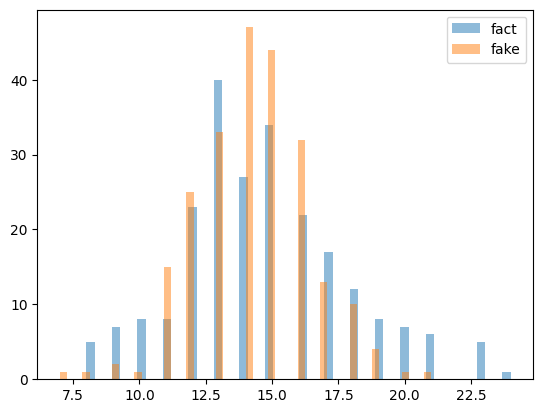

In [4]:
# some data analysis
df_facts['fact_len'] = df_facts['fact'].apply(lambda x: len(x.split()))
df_fakes['fake_fact_len'] = df_fakes['fake_fact'].apply(lambda x: len(x.split()))

plt.hist(df_facts['fact_len'], bins=50, alpha=0.5, label='fact')
plt.hist(df_fakes['fake_fact_len'], bins=50, alpha=0.5, label='fake')
plt.legend(loc='upper right')

df_facts['fact_len'].describe()
#df_fakes['fake_fact_len'].describe()


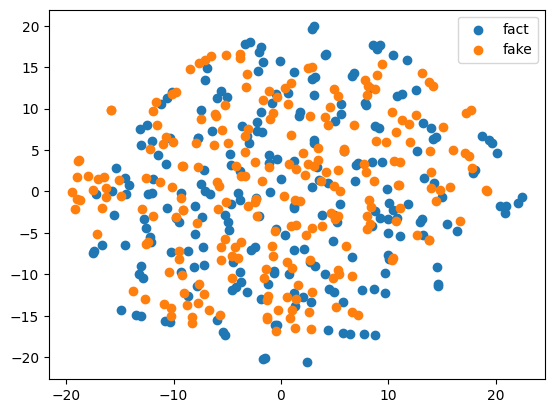

In [5]:
# t-SNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

vectorizer = TfidfVectorizer()
tsne = TSNE(n_components=2, random_state=0)

X_facts = vectorizer.fit_transform(df_facts['fact'])
X_facts_tsne = tsne.fit_transform(X_facts.toarray())
X_fake = vectorizer.fit_transform(df_fakes['fake_fact'])
X_fake_tsne = tsne.fit_transform(X_fake.toarray())
# plot
plt.scatter(X_facts_tsne[:, 0], X_facts_tsne[:, 1], label='fact')

plt.scatter(X_fake_tsne[:, 0], X_fake_tsne[:, 1], label='fake')
plt.legend(loc='upper right')

## Part 2: Preprocessing

In [6]:
# import txt files into nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'data/'
fact_corpus = PlaintextCorpusReader(corpus_root, 'facts.txt')
fake_corpus = PlaintextCorpusReader(corpus_root, 'fakes.txt')

# create a list of words
fact_words = fact_corpus.words()
fake_words = fake_corpus.words()

# create a list of sentences
fact_sents = fact_corpus.sents()
fake_sents = fake_corpus.sents()

# print most common words
fact_words_freq = nltk.FreqDist(fact_words)
fake_words_freq = nltk.FreqDist(fake_words)
fact_words_freq.most_common(10)
fake_words_freq.most_common(10)



[('.', 173),
 ("'", 156),
 ('and', 137),
 ('the', 113),
 ('their', 104),
 ('have', 101),
 ('are', 98),
 ('to', 91),
 ('in', 77),
 ('they', 64)]